# Data Prep for Model 1
In this notebook we will clean the flights_10000 dataset

We will incoporate these additional features: weather, categorical variables to numeric variables

In [20]:
# Import sys so we can import custom packages without error
import sys
sys.path.append('../')

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from src.modules.data_preprocessing import time_of_day, feature_categorizer, make_regions

import warnings
warnings.filterwarnings('ignore')

In [4]:
flights = pd.read_csv('../data/flights_10000.csv')

In [5]:
flights.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,orig_weather_categ,dest_weather_categ
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cloudy,cloudy
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rain,rain


## Replace null with 0

In [6]:
pd.isnull(flights).sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  31
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 151
dep_delay                156
taxi_out                 159
wheels_off               159
wheels_on                167
taxi_in                  167
crs_arr_time               0
arr_time                 163
arr_delay                193
cancelled                  0
cancellation_code       9842
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      191
air_time                 195
flights                    0
distance                   0
carrier_delay           8148
weather_delay 

In [7]:
flights.fillna(0, inplace = True)

## Remove features

In [8]:
#remove categorical int features
flights.drop(['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id', 'dep_delay', 
                 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name', 'taxi_out', 'wheels_off', 
                 'wheels_on', 'taxi_in', 'arr_time', 'cancelled', 'diverted', 'actual_elapsed_time', 'dep_time','air_time',], axis = 1, inplace = True)

In [9]:
#remove unwanted object features
flights.drop(['branded_code_share', 'mkt_carrier', 'op_unique_carrier', 'tail_num', 'dup', 'cancellation_code'], axis = 1, inplace = True)

In [10]:
#drop delay features (these will not be known and should not be used for training)
flights.drop(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], axis = 1, inplace = True)

In [11]:
flights.dtypes

fl_date                object
mkt_unique_carrier     object
origin                 object
origin_city_name       object
dest                   object
dest_city_name         object
crs_dep_time            int64
crs_arr_time            int64
arr_delay             float64
crs_elapsed_time      float64
flights               float64
distance              float64
orig_weather_categ     object
dest_weather_categ     object
dtype: object

In [12]:
flights.head(2)

,fl_date,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ
0,2018-07-10,WN,SAT,"San Antonio, TX",BNA,"Nashville, TN",705,915,-2.0,130.0,1.0,822.0,cloudy,cloudy
1,2019-10-10,UA,ORD,"Chicago, IL",MCO,"Orlando, FL",800,1148,-9.0,168.0,1.0,1005.0,rain,rain


### Turn date time to year, month, day

In [13]:
flights['fl_date'] = pd.to_datetime(flights['fl_date'])

In [14]:
#split date into three cols
import datetime as dt
flights['year'] = flights['fl_date'].dt.year
flights['month'] = flights['fl_date'].dt.month
flights['day'] = flights['fl_date'].dt.day

In [15]:
flights.drop(['fl_date'],axis = 1, inplace = True)

In [16]:
flights.head(1)

,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ,year,month,day
0,WN,SAT,"San Antonio, TX",BNA,"Nashville, TN",705,915,-2.0,130.0,1.0,822.0,cloudy,cloudy,2018,7,10


## Add Features
### Add time of day feature

In [17]:
flights['dep_time_of_day'] = flights.apply(lambda df: time_of_day(df, method='dep'), axis=1)
flights['arr_time_of_day'] = flights.apply(lambda df: time_of_day(df, method='arr'), axis=1)

In [18]:
feature_categorizer(flights[['dep_time_of_day','arr_time_of_day']], flights)

In [19]:
flights.head(2)

,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ,year,month,day,dep_time_of_day,arr_time_of_day
0,WN,SAT,"San Antonio, TX",BNA,"Nashville, TN",705,915,-2.0,130.0,1.0,822.0,cloudy,cloudy,2018,7,10,0,0
1,UA,ORD,"Chicago, IL",MCO,"Orlando, FL",800,1148,-9.0,168.0,1.0,1005.0,rain,rain,2019,10,10,0,0


In [20]:
flights.dtypes

mkt_unique_carrier     object
origin                 object
origin_city_name       object
dest                   object
dest_city_name         object
crs_dep_time            int64
crs_arr_time            int64
arr_delay             float64
crs_elapsed_time      float64
flights               float64
distance              float64
orig_weather_categ     object
dest_weather_categ     object
year                    int64
month                   int64
day                     int64
dep_time_of_day         int64
arr_time_of_day         int64
dtype: object

## Add Regions

In [21]:
def o_state_creator(row):
    return str(row["origin_city_name"].split(', ')[1]) 
def d_state_creator(row):
    return str(row["dest_city_name"].split(', ')[1]) 

In [22]:
#adding state to the whole data frame
flights["orig_state_id"] = flights.apply(o_state_creator, axis = 1)    

In [23]:
flights["dest_state_id"] = flights.apply(d_state_creator, axis = 1)

In [24]:
flights.head(1)

,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ,year,month,day,dep_time_of_day,arr_time_of_day,orig_state_id,dest_state_id
0,WN,SAT,"San Antonio, TX",BNA,"Nashville, TN",705,915,-2.0,130.0,1.0,822.0,cloudy,cloudy,2018,7,10,0,0,TX,TN


In [25]:
make_regions(flights, 'orig_state_id')
make_regions(flights, 'dest_state_id')

In [26]:
flights.head(2)

,mkt_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,flights,...,dest_weather_categ,year,month,day,dep_time_of_day,arr_time_of_day,orig_state_id,dest_state_id,orig_region,dest_region
0,WN,SAT,"San Antonio, TX",BNA,"Nashville, TN",705,915,-2.0,130.0,1.0,...,cloudy,2018,7,10,0,0,TX,TN,West-South Central,East-South Central
1,UA,ORD,"Chicago, IL",MCO,"Orlando, FL",800,1148,-9.0,168.0,1.0,...,rain,2019,10,10,0,0,IL,FL,East-North Central,South-Atlantic


In [29]:
flights.drop(['origin_city_name', 'dest_city_name', 'orig_state_id', 'dest_state_id'], axis = 1, inplace = True)

In [74]:
#export this file as flights_M1
flights.to_csv('data/flights_M1.csv', header=True, index=False)

# Split the data into Train and Test
there are a few features we want to create that should only be created from the test data

In [30]:
X = flights.drop(['arr_delay'], axis = 1)
y = flights['arr_delay']

In [31]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
flights_M1 = X_train

## Create Features based on only train data

### Create mean delay by airport feature to use in place of origin airport

In [33]:
mean_delay_orig_airport = flights[['origin', 'arr_delay']].groupby(by = 'origin').mean().reset_index()
mean_delay_orig_airport

,origin,arr_delay
0,ABE,0.461538
1,ABI,18.000000
2,ABQ,3.342857
3,ABY,-15.000000
4,ACK,-19.000000
...,...,...
307,WRG,2.666667
308,XNA,2.727273
309,XWA,-14.000000
310,YAK,81.000000


In [34]:
#rename aggregate column
mean_delay_orig_airport.rename({'arr_delay':'mean_arr_delay_orig_airport'},axis = 1, inplace= True)

In [35]:
#merge this mean value to flights_M1 with origin as key
flights_M1 = pd.merge(flights_M1, mean_delay_orig_airport, how = 'left', on = ['origin'])

In [36]:
#mean delay for dest airport
mean_delay_dest_airport = flights[['dest', 'arr_delay']].groupby(by = 'dest').mean().reset_index()
mean_delay_dest_airport.rename({'arr_delay':'mean_arr_delay_dest_airport'},axis = 1, inplace= True)

In [37]:
mean_delay_dest_airport.head(1)

,dest,mean_arr_delay_dest_airport
0,ABE,20.5


In [38]:
#merge this mean value to flights_M1 with dest as key
flights_M1 = pd.merge(flights_M1, mean_delay_dest_airport, how = 'left', on = ['dest'])

### Create mean delay by carrier feature

<AxesSubplot:xlabel='mkt_unique_carrier', ylabel='arr_delay'>

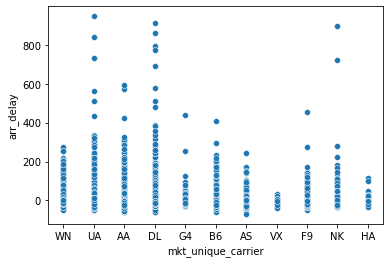

In [39]:
import seaborn as sns
sns.scatterplot(data=flights, x="mkt_unique_carrier", y="arr_delay")

In [40]:
#mean delay for carrier
mean_delay_carrier = flights[['mkt_unique_carrier', 'arr_delay']].groupby(by = 'mkt_unique_carrier').mean().reset_index()

In [41]:
mean_delay_carrier

,mkt_unique_carrier,arr_delay
0,AA,5.078223
1,AS,0.248687
2,B6,12.312329
3,DL,3.853175
4,F9,16.312883
5,G4,6.519685
6,HA,1.037736
7,NK,9.975709
8,UA,8.249349
9,VX,-8.600000


In [42]:
mean_delay_carrier.rename({'arr_delay':'mean_arr_delay_carrier'},axis = 1, inplace= True)

In [43]:
#merge this mean value to flights_M1 with mkt unique carrier as key
flights_M1 = pd.merge(flights_M1, mean_delay_carrier, how = 'left', on = ['mkt_unique_carrier'])

In [44]:
flights_M1.head(1)

,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ,year,month,day,dep_time_of_day,arr_time_of_day,orig_region,dest_region,mean_arr_delay_orig_airport,mean_arr_delay_dest_airport,mean_arr_delay_carrier
0,UA,MCI,DEN,801,850,109.0,1.0,533.0,sunny,sunny,2018,12,16,0,0,West-North Central,South-West,-1.652778,7.98615,8.249349


In [45]:
#now we can drop these categorical feature
flights_M1.drop(['mkt_unique_carrier', 'origin', 'dest'], axis = 1, inplace = True)

### Turn the weather categorical features to dummy variables

In [46]:
flights_M1.dtypes    #make sure the weather features are the only object types left

crs_dep_time                     int64
crs_arr_time                     int64
crs_elapsed_time               float64
flights                        float64
distance                       float64
orig_weather_categ              object
dest_weather_categ              object
year                             int64
month                            int64
day                              int64
dep_time_of_day                  int64
arr_time_of_day                  int64
orig_region                     object
dest_region                     object
mean_arr_delay_orig_airport    float64
mean_arr_delay_dest_airport    float64
mean_arr_delay_carrier         float64
dtype: object

In [47]:
flights_M1 = pd.get_dummies(flights_M1, drop_first=True)

In [48]:
flights_M1.head(1)

,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,year,month,day,dep_time_of_day,arr_time_of_day,...,dest_region_East-South Central,dest_region_Mid-Atlantic,dest_region_New England,dest_region_North-West,dest_region_Offshore Territory,dest_region_Pacific,dest_region_South-Atlantic,dest_region_South-West,dest_region_West-North Central,dest_region_West-South Central
0,801,850,109.0,1.0,533.0,2018,12,16,0,0,...,0,0,0,0,0,0,0,1,0,0


# Apply same process to test set

keep only the features we would have 1 week before the flight:

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

In [49]:
test_M1 = X_test

In [50]:
test_M1.head(2)

,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ,year,month,day,dep_time_of_day,arr_time_of_day,orig_region,dest_region
6252,UA,COS,DEN,738,840,62.0,1.0,73.0,sunny,sunny,2019,12,25,0,0,South-West,South-West
4684,F9,HSV,MCO,1917,2207,110.0,1.0,535.0,rain,sunny,2019,10,22,3,1,East-South Central,South-Atlantic


### Assign mean delay by airport feature from train data set

In [51]:
mean_delay_orig_airport

,origin,mean_arr_delay_orig_airport
0,ABE,0.461538
1,ABI,18.000000
2,ABQ,3.342857
3,ABY,-15.000000
4,ACK,-19.000000
...,...,...
307,WRG,2.666667
308,XNA,2.727273
309,XWA,-14.000000
310,YAK,81.000000


In [52]:
#merge this mean value to test set with origin as key
test_M1 = pd.merge(test_M1, mean_delay_orig_airport, how = 'left', on = ['origin'])

In [53]:
mean_delay_dest_airport.head(2)

,dest,mean_arr_delay_dest_airport
0,ABE,20.5
1,ABI,9.6


In [54]:
#merge this mean value to test set with dest as key
test_M1 = pd.merge(test_M1, mean_delay_dest_airport, how = 'left', on = ['dest'])

In [55]:
test_M1.head(2)

,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ,year,month,day,dep_time_of_day,arr_time_of_day,orig_region,dest_region,mean_arr_delay_orig_airport,mean_arr_delay_dest_airport
0,UA,COS,DEN,738,840,62.0,1.0,73.0,sunny,sunny,2019,12,25,0,0,South-West,South-West,1.562500,7.986150
1,F9,HSV,MCO,1917,2207,110.0,1.0,535.0,rain,sunny,2019,10,22,3,1,East-South Central,South-Atlantic,8.142857,6.542373


### Assign mean delay by carrier feature (created from train set)

In [56]:
mean_delay_carrier

,mkt_unique_carrier,mean_arr_delay_carrier
0,AA,5.078223
1,AS,0.248687
2,B6,12.312329
3,DL,3.853175
4,F9,16.312883
5,G4,6.519685
6,HA,1.037736
7,NK,9.975709
8,UA,8.249349
9,VX,-8.600000


In [57]:
#merge this mean value to test set with mkt unique carrier as key
test_M1 = pd.merge(test_M1, mean_delay_carrier, how = 'left', on = ['mkt_unique_carrier'])

In [58]:
test_M1.head(1)

,mkt_unique_carrier,origin,dest,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ,year,month,day,dep_time_of_day,arr_time_of_day,orig_region,dest_region,mean_arr_delay_orig_airport,mean_arr_delay_dest_airport,mean_arr_delay_carrier
0,UA,COS,DEN,738,840,62.0,1.0,73.0,sunny,sunny,2019,12,25,0,0,South-West,South-West,1.5625,7.98615,8.249349


In [59]:
#now we can drop the 'mkt_unique_carrier' categorical feature
test_M1.drop(['mkt_unique_carrier', 'origin', 'dest'], axis = 1, inplace = True)

In [60]:
test_M1.head(1)

,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ,year,month,day,dep_time_of_day,arr_time_of_day,orig_region,dest_region,mean_arr_delay_orig_airport,mean_arr_delay_dest_airport,mean_arr_delay_carrier
0,738,840,62.0,1.0,73.0,sunny,sunny,2019,12,25,0,0,South-West,South-West,1.5625,7.98615,8.249349


## Check features

In [61]:
test_M1.dtypes

crs_dep_time                     int64
crs_arr_time                     int64
crs_elapsed_time               float64
flights                        float64
distance                       float64
orig_weather_categ              object
dest_weather_categ              object
year                             int64
month                            int64
day                              int64
dep_time_of_day                  int64
arr_time_of_day                  int64
orig_region                     object
dest_region                     object
mean_arr_delay_orig_airport    float64
mean_arr_delay_dest_airport    float64
mean_arr_delay_carrier         float64
dtype: object

In [62]:
test_M1.head(2)

,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,orig_weather_categ,dest_weather_categ,year,month,day,dep_time_of_day,arr_time_of_day,orig_region,dest_region,mean_arr_delay_orig_airport,mean_arr_delay_dest_airport,mean_arr_delay_carrier
0,738,840,62.0,1.0,73.0,sunny,sunny,2019,12,25,0,0,South-West,South-West,1.562500,7.986150,8.249349
1,1917,2207,110.0,1.0,535.0,rain,sunny,2019,10,22,3,1,East-South Central,South-Atlantic,8.142857,6.542373,16.312883


### Convert weather categories to dummy variables

In [63]:
test_M1 = pd.get_dummies(test_M1, drop_first=True)

In [64]:
test_M1.head(1)

,crs_dep_time,crs_arr_time,crs_elapsed_time,flights,distance,year,month,day,dep_time_of_day,arr_time_of_day,...,dest_region_East-South Central,dest_region_Mid-Atlantic,dest_region_New England,dest_region_North-West,dest_region_Offshore Territory,dest_region_Pacific,dest_region_South-Atlantic,dest_region_South-West,dest_region_West-North Central,dest_region_West-South Central
0,738,840,62.0,1.0,73.0,2019,12,25,0,0,...,0,0,0,0,0,0,0,1,0,0


## final check to make sure the shapes match

In [65]:
flights_M1.shape

(8000, 43)

In [66]:
test_M1.shape

(2000, 43)

In [67]:
flights_M1.columns

Index(['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'flights',
       'distance', 'year', 'month', 'day', 'dep_time_of_day',
       'arr_time_of_day', 'mean_arr_delay_orig_airport',
       'mean_arr_delay_dest_airport', 'mean_arr_delay_carrier',
       'orig_weather_categ_no weather data', 'orig_weather_categ_rain',
       'orig_weather_categ_snow', 'orig_weather_categ_snow & rain',
       'orig_weather_categ_sunny', 'dest_weather_categ_no weather data',
       'dest_weather_categ_rain', 'dest_weather_categ_snow',
       'dest_weather_categ_snow & rain', 'dest_weather_categ_sunny',
       'orig_region_East-South Central', 'orig_region_Mid-Atlantic',
       'orig_region_New England', 'orig_region_North-West',
       'orig_region_Offshore Territory', 'orig_region_Pacific',
       'orig_region_South-Atlantic', 'orig_region_South-West',
       'orig_region_West-North Central', 'orig_region_West-South Central',
       'dest_region_East-South Central', 'dest_region_Mid-Atlantic',
    

In [68]:
test_M1.columns

Index(['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'flights',
       'distance', 'year', 'month', 'day', 'dep_time_of_day',
       'arr_time_of_day', 'mean_arr_delay_orig_airport',
       'mean_arr_delay_dest_airport', 'mean_arr_delay_carrier',
       'orig_weather_categ_no weather data', 'orig_weather_categ_rain',
       'orig_weather_categ_snow', 'orig_weather_categ_snow & rain',
       'orig_weather_categ_sunny', 'dest_weather_categ_no weather data',
       'dest_weather_categ_rain', 'dest_weather_categ_snow',
       'dest_weather_categ_snow & rain', 'dest_weather_categ_sunny',
       'orig_region_East-South Central', 'orig_region_Mid-Atlantic',
       'orig_region_New England', 'orig_region_North-West',
       'orig_region_Offshore Territory', 'orig_region_Pacific',
       'orig_region_South-Atlantic', 'orig_region_South-West',
       'orig_region_West-North Central', 'orig_region_West-South Central',
       'dest_region_East-South Central', 'dest_region_Mid-Atlantic',
    

### Run Model 1

In [69]:
from src.modules.data_preprocessing import regression

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [71]:
regressor_list = [LinearRegression, SVR, RandomForestRegressor]

In [72]:
regression(flights_M1, test_M1, y_train, y_test, regressor_list)

Regressor: <class 'sklearn.linear_model._base.LinearRegression'> 
 MSE = 2391.379394421998 
 R2 = -0.017984951129142335 
 ----------------------------
Regressor: <class 'sklearn.svm._classes.SVR'> 
 MSE = 2380.537567902853 
 R2 = -0.013369700088263325 
 ----------------------------
Regressor: <class 'sklearn.ensemble._forest.RandomForestRegressor'> 
 MSE = 2549.2874101499997 
 R2 = -0.0852047256445212 
 ----------------------------
